In [1]:
# Cell 1: Import required libraries
# We will use pandas for data handling and matplotlib for plotting.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Replace filenames if yours differ.
df_x = pd.read_csv('LSM6DS3_Motion_Tracker-accel_x.csv', parse_dates=['time'])
df_y = pd.read_csv('LSM6DS3_Motion_Tracker-accel_y.csv', parse_dates=['time'])
df_z = pd.read_csv('LSM6DS3_Motion_Tracker-accel_z.csv', parse_dates=['time'])


In [ ]:
df_x.rename(columns={'value': 'accel_x'}, inplace=True)
df_y.rename(columns={'value': 'accel_y'}, inplace=True)
df_z.rename(columns={'value': 'accel_z'}, inplace=True)


In [ ]:
# use an outer join to keep any unmatched rows, then sort and reset the index.
df = df_x.merge(df_y, on='time', how='outer').merge(df_z, on='time', how='outer')
df.sort_values('time', inplace=True)
df.reset_index(drop=True, inplace=True)


In [ ]:

# drop any rows with missing (NaN) values.
cleaned_df = df.dropna().loc[df['time'] >= '2025-08-20 01:35']


In [18]:
cleaned_df

,time,accel_x,accel_y,accel_z
1351,2025-08-20 01:35:00.582202526+00:00,0.031860,0.018555,1.017944
1352,2025-08-20 01:35:00.877170887+00:00,0.032471,0.018677,1.017822
1353,2025-08-20 01:35:01.487184917+00:00,0.032227,0.019043,1.017578
1354,2025-08-20 01:35:01.802368376+00:00,0.031860,0.019287,1.017212
1355,2025-08-20 01:35:02.520681172+00:00,0.031494,0.018799,1.017456
...,...,...,...,...
2731,2025-08-20 01:46:54.127499307+00:00,0.163818,-0.948853,0.295410
2732,2025-08-20 01:46:54.819356432+00:00,0.167725,-0.944824,0.290527
2733,2025-08-20 01:46:55.127290250+00:00,0.164917,-0.948608,0.293213
2734,2025-08-20 01:46:55.745100718+00:00,0.166504,-0.949341,0.292236


In [20]:

cleaned_df.to_csv('sensor_data_cleaned.csv', index=False)
print(f"Cleaned data saved: {len(cleaned_df)} rows")

Cleaned data saved: 1315 rows


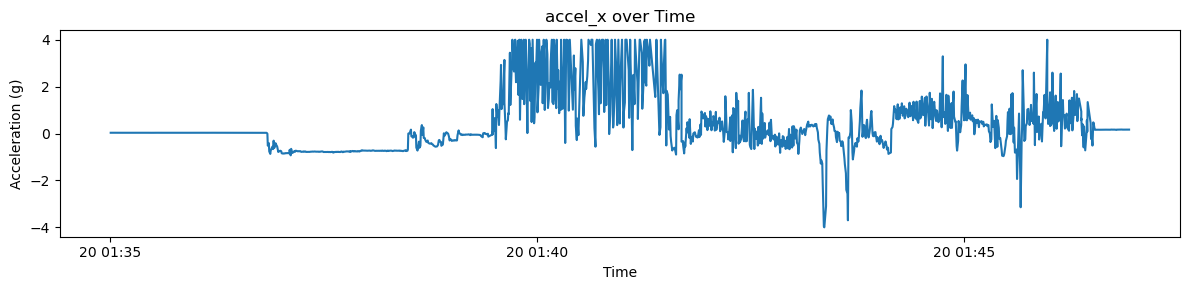

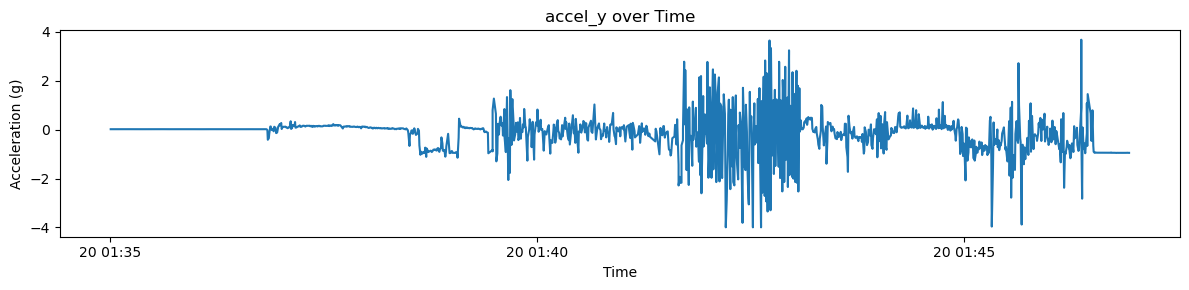

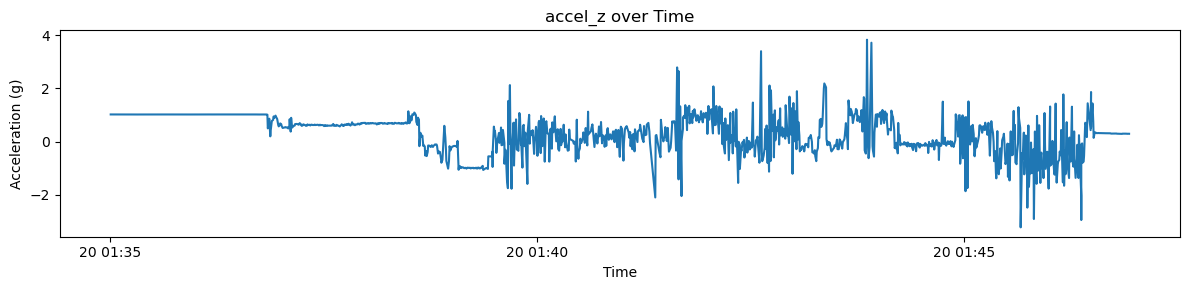

In [ ]:
for axis in ['accel_x', 'accel_y', 'accel_z']:
    plt.figure(figsize=(12, 3))
    plt.plot(cleaned_df['time'], cleaned_df[axis], color='C0')
    plt.title(f"{axis} over Time")
    plt.xlabel("Time")
    plt.ylabel("Acceleration (g)")
    plt.tight_layout()
    plt.savefig(f"{axis}_plot.png")
    plt.show()


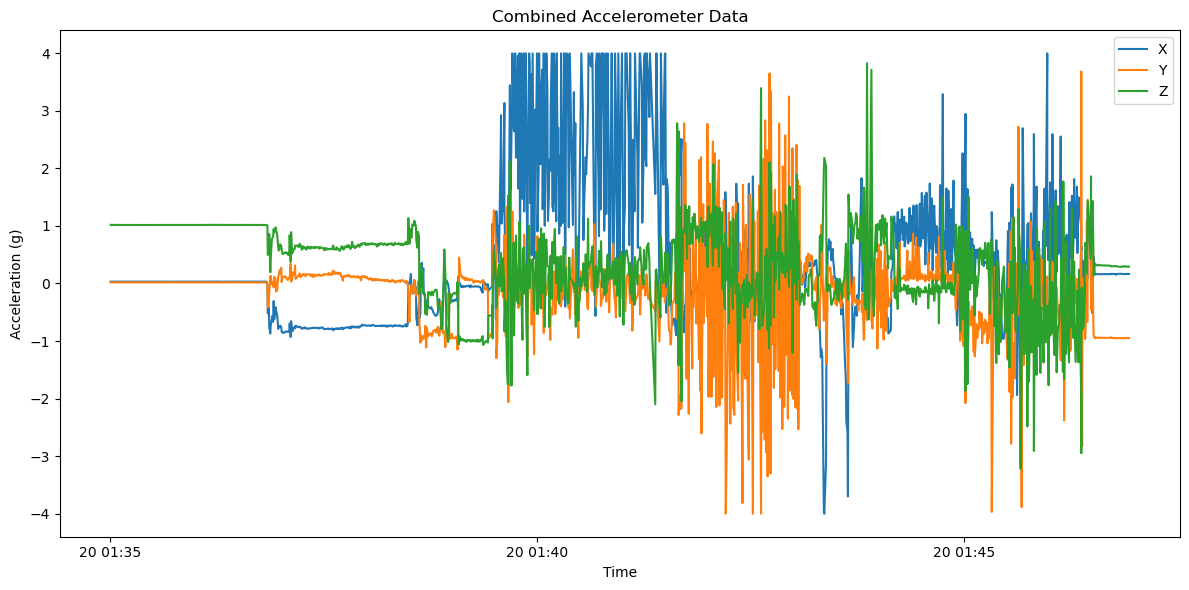

In [21]:
# Cell 8: Plot combined accelerometer data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df['time'], cleaned_df['accel_x'], label='X')
plt.plot(cleaned_df['time'], cleaned_df['accel_y'], label='Y')
plt.plot(cleaned_df['time'], cleaned_df['accel_z'], label='Z')
plt.title("Combined Accelerometer Data")
plt.xlabel("Time")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.tight_layout()
plt.savefig("combined_plot.png")
plt.show()
